In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [7]:
df = pd.read_csv('/Users/ibrahim/Downloads/gld_price_data.csv')

In [8]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
df.head(10).style.background_gradient()  

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [23]:
df.sample(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
1695,9/15/2015,1978.089966,105.900002,14.570000,13.770000,1.127180
2194,12/18/2017,2690.159912,119.730003,11.440000,15.220000,1.174357
1518,11/28/2014,2067.560059,112.110001,25.580000,14.830000,1.246199
1722,11/2/2015,2104.050049,108.589996,14.750000,14.720000,1.102597
632,11/30/2010,1180.550049,135.419998,36.040001,27.440001,1.310393
1194,6/6/2013,1622.560059,136.529999,33.619999,21.930000,1.324556
272,4/6/2009,835.479980,85.269997,30.230000,11.940000,1.327739
1706,10/6/2015,1979.920044,109.860001,15.740000,15.070000,1.126799
1552,1/20/2015,2022.550049,124.199997,17.480000,17.180000,1.159797
1503,11/6/2014,2031.209961,109.879997,29.600000,14.820000,1.248003


In [24]:
df.shape

(2290, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [28]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [30]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [44]:
df.duplicated().sum()

0

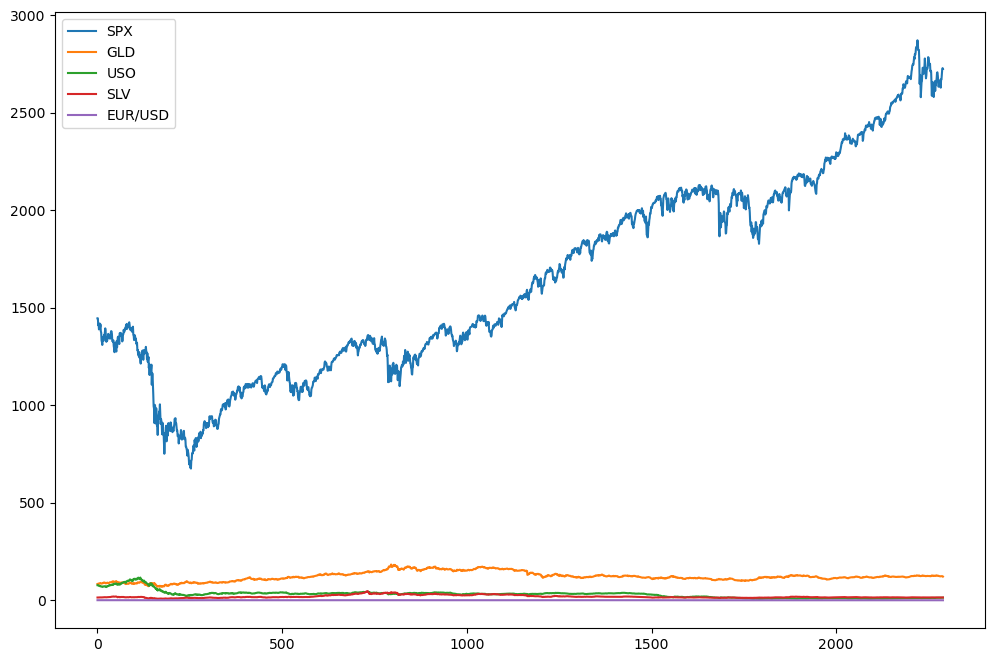

In [41]:
plt.rcParams['figure.figsize'] = [12,8]
df.plot()


In [42]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [49]:
data = df.drop(['Date'], axis=1)

Text(4.944444444444445, 0.5, 'Occurrence ')

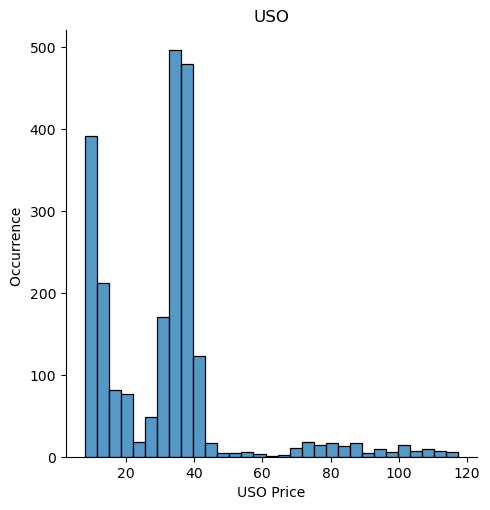

In [52]:
sns.displot(data['USO'])
plt.title("USO")
plt.xlabel("USO Price")
plt.ylabel("Occurrence ")

Text(4.944444444444445, 0.5, 'Occurrence')

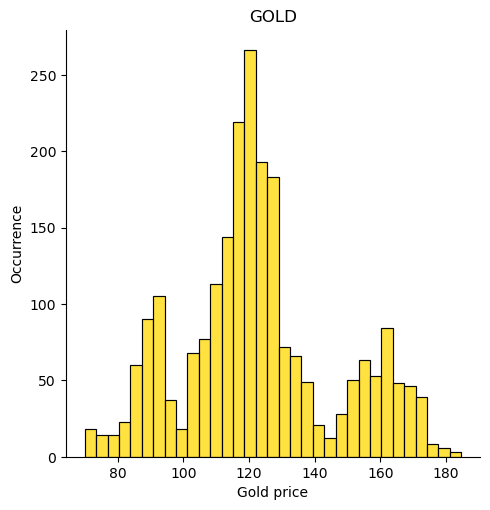

In [55]:
sns.displot(data['GLD'], color='gold')
plt.title('GOLD')
plt.xlabel("Gold price")
plt.ylabel("Occurrence")

Text(4.944444444444445, 0.5, 'Occurrence')

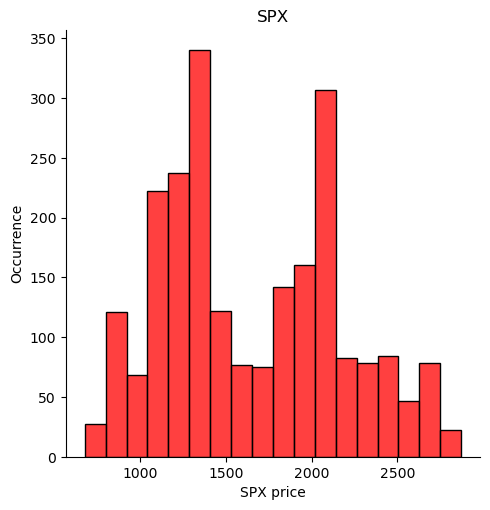

In [59]:
sns.displot(data['SPX'], color='red')
plt.title("SPX")
plt.xlabel("SPX price")
plt.ylabel("Occurrence")

Text(4.944444444444445, 0.5, 'Occurrence')

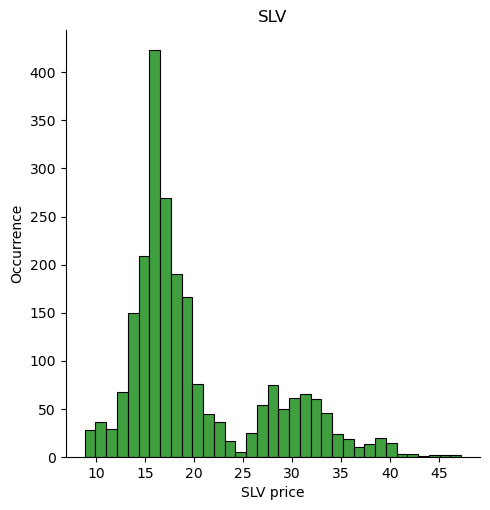

In [61]:
sns.displot(data['SLV'], color='green')
plt.title("SLV")
plt.xlabel("SLV price")
plt.ylabel("Occurrence")

Text(4.944444444444445, 0.5, 'Occurrence')

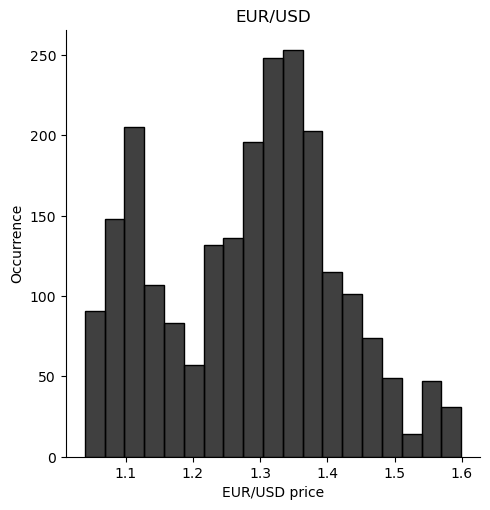

In [62]:
sns.displot(data['EUR/USD'], color='black')
plt.title("EUR/USD")
plt.xlabel("EUR/USD price")
plt.ylabel("Occurrence")

In [63]:
Correlation = data.corr()

<Axes: >

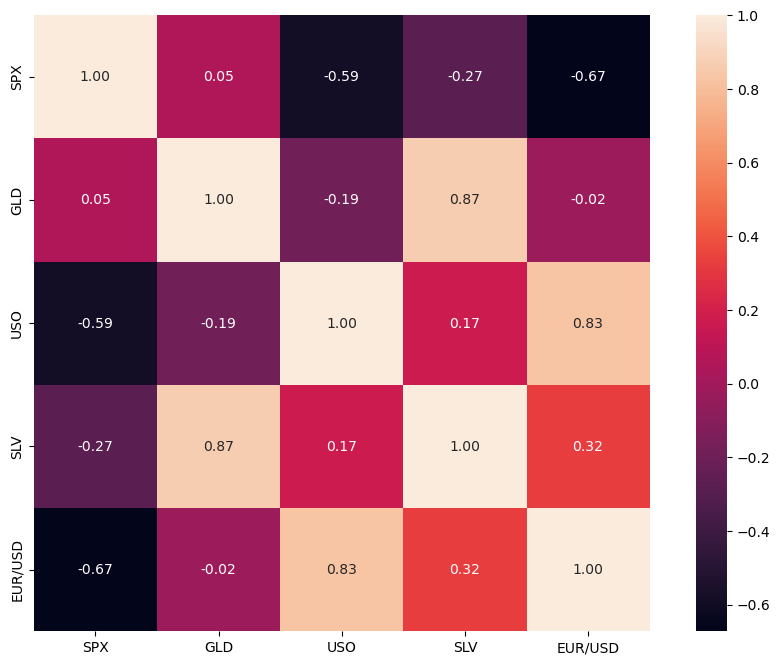

In [78]:
sns.heatmap(Correlation, cbar=True, square=True, fmt='.2f', annot=True ,annot_kws={'size':10})

In [80]:
X = data.drop(['GLD'], axis=1)
y = data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [81]:
model = RandomForestRegressor()

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
score = model.predict(X_test)

In [91]:
metrics.r2_score(y_test, score)

0.9896312154313857

In [92]:
y_test = np.array(y_test)

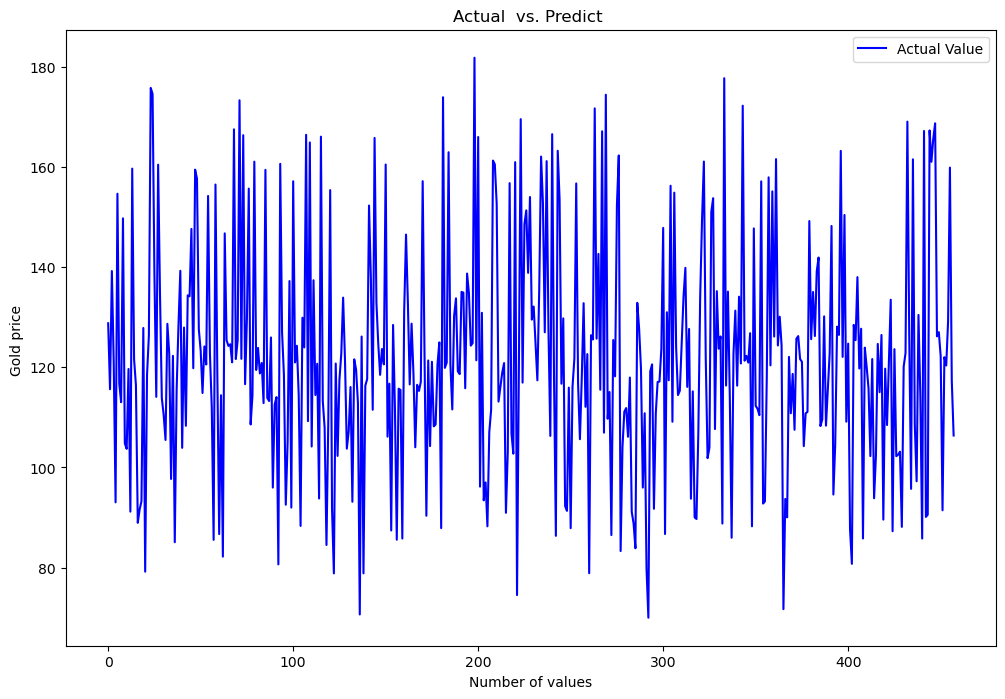

In [108]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(y_test, label='Actual Value', color = 'blue')
plt.title("Actual  vs. Predict ")
plt.xlabel("Number of values")
plt.ylabel("Gold price ")
plt.legend()
plt.show()

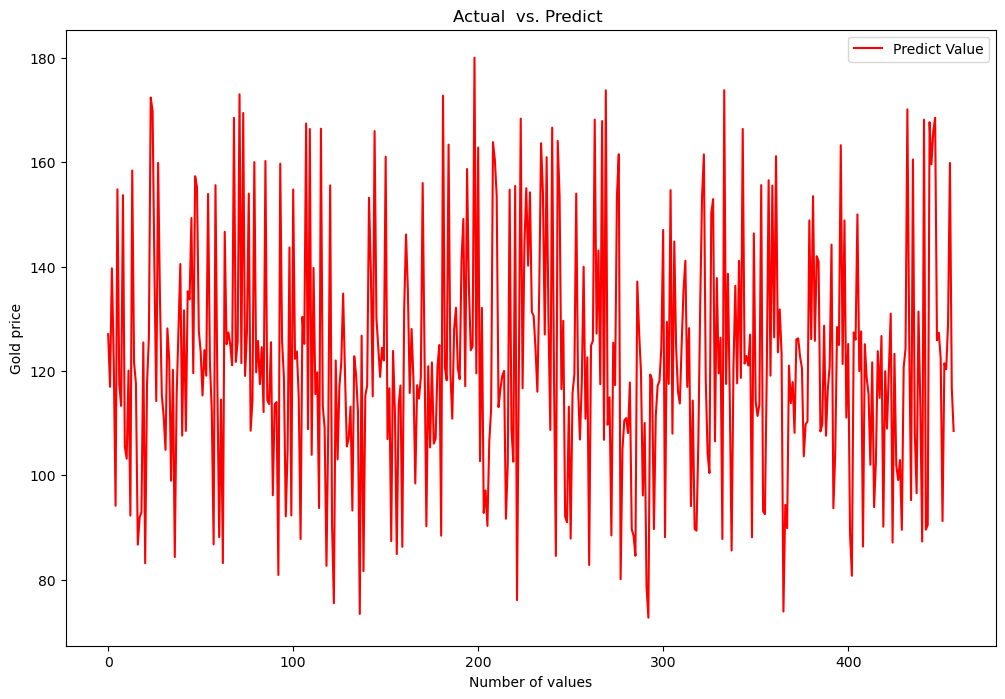

In [110]:
plt.figure(figsize=(12,8)) # **same** plt.rcParams['figure.figsize'] = [12,8]


plt.plot(score, label ='Predict Value', color='red')
plt.title("Actual  vs. Predict ")
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

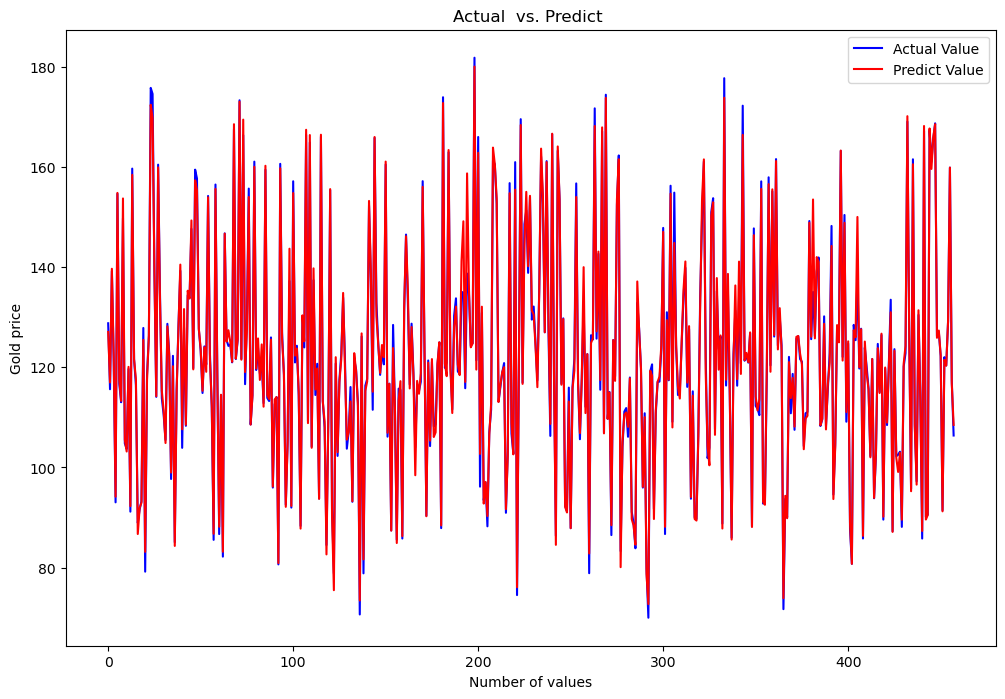

In [113]:
plt.figure(figsize=(12,8))

plt.plot(y_test, label='Actual Value', color = 'blue')
plt.plot(score, label ='Predict Value', color='red')
plt.title("Actual  vs. Predict ")
plt.xlabel('Number of values')
plt.ylabel('Gold price')

plt.legend()
plt.show()

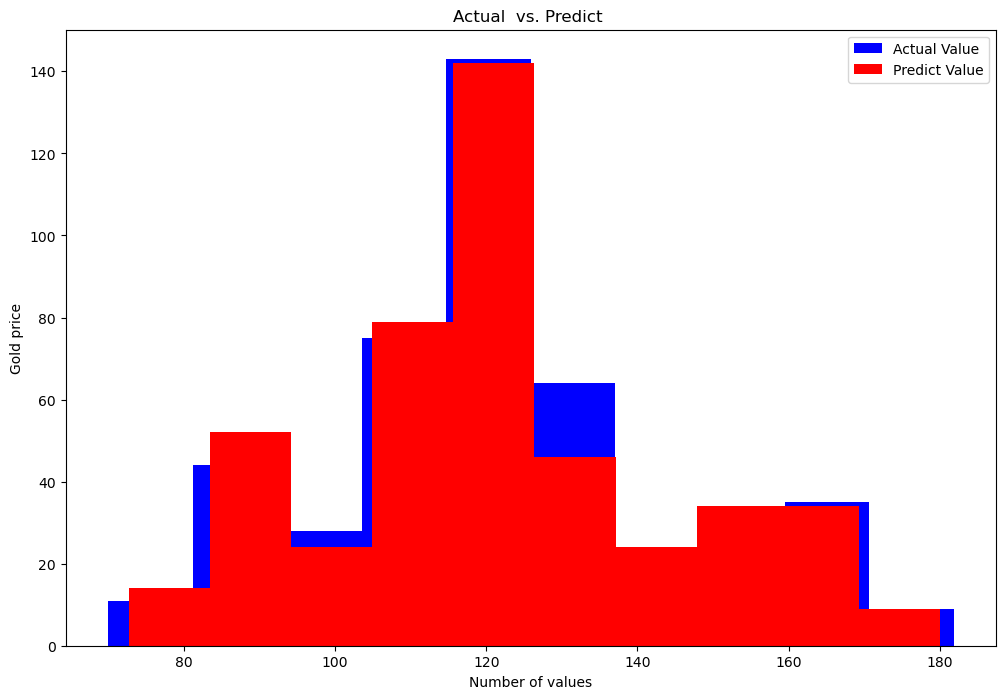

In [114]:
plt.figure(figsize=(12,8))

plt.hist(y_test, label='Actual Value', color = 'blue')
plt.hist(score, label ='Predict Value', color='red')
plt.title("Actual  vs. Predict ")
plt.xlabel('Number of values')
plt.ylabel('Gold price')

plt.legend()
plt.show()

In [115]:
def convertor(user_input):
    
    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [ ]:

print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):
    
    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"): 
        print("END")
        break
    input_data = convertor(user_input) 
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = model.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])


how many values will you calculate: (NOTE: Press q to break)
2
1447.160034	78.470001	15.180	1.471692


/Users/ibrahim/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  """Set or check the `feature_names_in_` attribute.


values =  (1447.160034, 78.470001, 15.18, 1.471692)
[84.80129985]
The cost of the gold is: 84.80129984999999
